# **Course: Data Science for Decision Support**
**Assignment 2** (Submission deadline 21.06.2022, 16:00), 

**Executor:** Eric Dietriche, Sesso Domtchoueng: 504999.

---
Your individual data for assignment 2:

| Last digit of Matr.Nr. | Task1, Q3 | Task 3 Q2a | Task 3 Q2b    | Task 3 Q2c    | Task 3 Q3bc |Task 4 Q2|
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 9      |90:10        |RadioButton      | MultipleSelect  | Dropbox    | Page 3 –Hyperparameters Page 2 - forecasts     |  MSE      |







# Problem: **Regression** (Total score 50) 

# **`Task 1 “Data Analysis” (10 Scores)`**

1)	Read the data from your individual variant into Python notebook

In [1]:

from google.colab import files
uploaded = files.upload()


Saving HousingData.csv to HousingData.csv


In [2]:
#add more cell if needed to each code cell
import pandas as pd
df = pd.read_csv("HousingData.csv")

2) Copy all necessary pre-processing steps from assignment 1.2. Scale your whole dataset.  Scale your whole dataset. with Standard Scaler. 

In [6]:
df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#use value_count() for count unique value in column
count=0
for column in df:
        count +=  len(df[column].value_counts(dropna=False))
print("number of Instance:",count)
print("number of variable:",len(df.columns))

number of Instance: 3026
number of variable: 14


In [4]:
#Write your code here 
Y = df['MEDV']
X = df.drop(['MEDV'],axis='columns')
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (506, 13)
Shape of Y: (506,)


In [7]:
#Write your code here 
#fill Nan Values with the mean values , if at least one value is nan-value. 
if (not (df.isnull().values.any())):
      print("There are no NAN values")
else:
  for column in df:
    if df[column].isnull().values.any(): 
              df[column] = df[column].fillna(df[column].mean())
 #Write your code here. 
from sklearn.preprocessing import StandardScaler
standard_scaler = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns = df.columns)

Y = standard_scaler['MEDV']
X = standard_scaler.drop(['MEDV'],axis='columns')
standard_scaler

There are no NAN values


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.422328,0.296443,-1.311010,-0.279851,-0.144217,0.413672,-1.210593e-01,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.104146,0.159686
1,-0.419870,-0.489639,-0.599771,-0.279851,-0.740262,0.194274,3.787156e-01,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.510353,-0.101524
2,-0.419872,-0.489639,-0.599771,-0.279851,-0.740262,1.282714,-2.706270e-01,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.239748,1.324247
3,-0.419277,-0.489639,-1.330435,-0.279851,-0.835284,1.016303,-8.287698e-01,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.395333,1.182758
4,-0.414981,-0.489639,-1.330435,-0.279851,-0.835284,1.228577,-5.223385e-01,1.077737,-0.752922,-1.106115,0.113032,0.441052,0.000000,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.415733,-0.489639,0.126411,-0.279851,0.158124,0.439316,2.121240e-02,-0.625796,-0.982843,-0.803212,1.176466,0.387217,0.000000,-0.014454
502,-0.417766,-0.489639,0.126411,-0.279851,0.158124,-0.234548,2.984598e-01,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.518917,-0.210362
503,-0.415952,-0.489639,0.126411,-0.279851,0.158124,0.984960,8.201227e-01,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-1.009938,0.148802
504,-0.410232,-0.489639,0.126411,-0.279851,0.158124,0.725672,7.581068e-01,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.890038,-0.057989


3) Divide your dataset into 2 parts: training set and test set **(take the propostion from individual variant)**. Output the dimension of the resulting datasets.


In [8]:
#Write your code here 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.9,random_state=5)
print('len(X_train):',len(X_train))
print('len(X_test):',len(X_test))
print('len(y_train):',len(y_train))
print('len(y_test):',len(y_test))


len(X_train): 455
len(X_test): 51
len(y_train): 455
len(y_test): 51


4) **Preliminary analysis:** For each model: train with training set and output the regression score (R2) of the model using training set. Now test your model with a testset and output the regression score (R2). Compare R2 inside one model for training and testing sets. Calculate other metrics MSE, RMSE, MAE, mentioned in the corresponding lecture. 

**Random Forest regression**

In [9]:
#Write your code for Random forest regression here
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error
import numpy as np
RF_rg = RandomForestRegressor(n_estimators=50, max_depth=2)
RF_rg.fit(X_train,  y_train)
y_predicted = RF_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
y_predicted = RF_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)

score R2 for training set: 0.7385907544981858
MSE for training set: 0.26228127612463087
RMSE for training set: 0.5121340411695271
MAE for training set: 0.35078846628189264


score R2 for testset: 0.7835643702131196
MSE for testset: 0.20938508016625795
RMSE for testset: 0.4575861450768128
MAE for testset: 0.36340004090377614


*Result of the Test :
arround 79% (R2 score) of the variability observed in the target variable is explained by the regression model.
the mean-squared-error is very low around 0.21 this means that the predicted values ​​are very close to the current values* 

**XGBoost regression**

In [10]:
#Write your code for XGBoost regression here 
from xgboost import XGBRegressor
XGB_rg = XGBRegressor(objective='reg:squarederror')
XGB_rg.fit(X_train,  y_train)
y_predicted = XGB_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
y_predicted = XGB_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)

score R2 for training set: 0.9723416524279778
MSE for training set: 0.02775061257976141
RMSE for training set: 0.16658515113827346
MAE for training set: 0.1266689145382427


score R2 for testset: 0.8376078799840876
MSE for testset: 0.1571020774231208
RMSE for testset: 0.3963610442804903
MAE for testset: 0.26845392746847785


*Result of the Test :
arround 84% (R2 score) of the variability observed in the target variable is explained by the regression model.but this score is lower than by the training Set. 
the mean-squared-error is very low around 0.16 this means that the predicted values ​​are very close to the current values*




**Cat Boost regression**

In [11]:
!pip install catboost 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 92 kB/s 


In [12]:
#Write your code for Cast Boost regression here 
from catboost import CatBoostRegressor
CatBoost_rg = CatBoostRegressor(verbose=0)
# fit the model on the whole training set
CatBoost_rg.fit(X_train,  y_train)
y_predicted = CatBoost_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
# Test the Model
y_predicted = CatBoost_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)

score R2 for training set: 0.9968257086053818
MSE for training set: 0.003184880458890005
RMSE for training set: 0.056434745138877036
MAE for training set: 0.04457127256571296


score R2 for testset: 0.8962958300163876
MSE for testset: 0.10032593047168503
RMSE for testset: 0.3167426881108466
MAE for testset: 0.21828986204977718


*Result of the Test :
arround 87% (R2 score) of the variability observed in the target variable is explained by the regression model.but this score is lower than by the training Set. 
the mean-squared-error is very low around 0.13 this means that the predicted values ​​are very close to the current values* 

In [13]:
from lightgbm import LGBMRegressor
LGBM_rg = LGBMRegressor()
# fit the model on the whole training set
LGBM_rg.fit(X_train,  y_train)
y_predicted = LGBM_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
# Test the Model
y_predicted = LGBM_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)


score R2 for training set: 0.9767211092175128
MSE for training set: 0.023356546435364306
RMSE for training set: 0.1528284869890568
MAE for training set: 0.09470519104262759


score R2 for testset: 0.838522068084874
MSE for testset: 0.15621766967122397
RMSE for testset: 0.3952438104148172
MAE for testset: 0.2836457549369124


*Result of the Test :
arround 84% (R2 score) of the variability observed in the target variable is explained by the regression model.but this score is lower than by the training Set. 
the mean-squared-error is very low around 0.15 this means that the predicted values ​​are very close to the current values*

*Training set:                                                                       
the best R2 score was obtained with Cast Boost Regression                         
MSE : the lowest MSE value was observed by the Cast Boost regression.                                                                           
Testset:                                                                          
the best R2 score was observed with Cast Boost Regression                              
the lowest MSE value was observed by the Cast Boost regression.*

5)	Recalculate the results of Task 1 using MinMaxScaler (use the same random_state as for Standard Scaler by splitting into trainingset and testset) and compare the results based on metric R2. Use the Scaler, which gives the best results for the next Tasks. 

In [14]:
from sklearn.preprocessing import MinMaxScaler
minMax_scaler = pd.DataFrame(
    MinMaxScaler().fit_transform(df),
    columns = df.columns
)
Y_minMax_scale = minMax_scaler['MEDV']
X_minMax_scale = minMax_scaler.drop(['MEDV'],axis='columns')
minMax_scaler

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.303130,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_minMax_scale, Y_minMax_scale,train_size=0.9,random_state=1)
#Write your code for Random forest regression here
RF_rg = RandomForestRegressor(verbose=0,n_estimators=50, max_depth=2)
print(type(RF_rg).__name__)
RF_rg.fit(X_train,  y_train)
y_predicted = RF_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
y_predicted = RF_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)
print('\n')
#Write your code for XGBoost regression here
print(type(XGB_rg).__name__)
XGB_rg = XGBRegressor(objective='reg:squarederror')
XGB_rg.fit(X_train,  y_train)
y_predicted = XGB_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
y_predicted = XGB_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)
print('\n')
#Write your code for CatBoost regression here
CatBoost_rg = CatBoostRegressor(verbose =0, n_estimators=100)
print(type(CatBoost_rg).__name__)
# fit the model on the whole training set
CatBoost_rg.fit(X_train,  y_train)
y_predicted = CatBoost_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
# Test the Model
y_predicted = CatBoost_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)
print('\n')
#Write your code for LightGBM regression here
LGBM_rg = LGBMRegressor()
print(type(LGBM_rg).__name__)
# fit the model on the whole training set
LGBM_rg.fit(X_train,  y_train)
y_predicted = LGBM_rg.predict(X_train)
R2 = r2_score(y_train,y_predicted)
print('score R2 for training set:',R2)
MSE = mean_squared_error(y_train,y_predicted)
print('MSE for training set:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for training set:',np.sqrt(MSE))
mae = mean_absolute_error(y_train, y_predicted)
print('MAE for training set:',mae)
print('\n')
# Test the Model
y_predicted = LGBM_rg.predict(X_test)
R2 = r2_score(y_test,y_predicted)
print('score R2 for testset:',R2)
MSE = mean_squared_error(y_test,y_predicted)
print('MSE for testset:',MSE)
RMSE = np.sqrt(MSE)
print('RMSE for testset:',np.sqrt(MSE))
mae = mean_absolute_error(y_test, y_predicted)
print('MAE for testset:',mae)


RandomForestRegressor
score R2 for training set: 0.7354096732944538
MSE for training set: 0.010907014994705108
RMSE for training set: 0.10443665541707618
MAE for training set: 0.07258617743925612


score R2 for testset: 0.834608397208852
MSE for testset: 0.007580144103846648
RMSE for testset: 0.08706402301666658
MAE for testset: 0.06842800302899743


XGBRegressor
score R2 for training set: 0.971698233519437
MSE for training set: 0.0011666631778404824
RMSE for training set: 0.03415645148197456
MAE for training set: 0.025900126591415776


score R2 for testset: 0.9133290475205441
MSE for testset: 0.003972259161437206
RMSE for testset: 0.06302586105272348
MAE for testset: 0.04791887977284285


CatBoostRegressor
score R2 for training set: 0.9910954903495155
MSE for training set: 0.000367064138313772
RMSE for training set: 0.01915891798389909
MAE for training set: 0.015005102741934275


score R2 for testset: 0.8990364176086294
MSE for testset: 0.004627311730775153
RMSE for testset: 0.0680243

*By comparing the R2 scores obtained with the Minmaxscaler and the standard scaler. Dataset should be scaled with Minmaxscaler, then R2 of all models by Testset are higher than with Standard Scaler* 

# **`Task 2 “Cross validation and grid search of hyperparameter values”  (10 Scores)`**

1)	Use the function GridSearchCV() to find the best parameters for each ML method. Use 5 fold cross validation. Use the scaling selected at the previous stage.

**Random Forest regression**

In [23]:
from sklearn.model_selection import GridSearchCV
# Parameter Tuning
model = RandomForestRegressor()
param_dist = {"max_depth": [10,30,50],
              "n_estimators": [10,30,50],
               "random_state":[5,10,0]
              }
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_
model = RandomForestRegressor(verbose=0,max_depth=10, n_estimators=30, random_state=10)
model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


RandomForestRegressor(max_depth=10, n_estimators=30, random_state=10)

*for the given parameter Grid . the GridSearchCV will find the best parameter based on the highest accuracy score.* 

**XGBoost regression**

In [24]:
#Write your code here. 
model = XGBRegressor()
param_dist = {"max_depth": [10,30,50],
              "n_estimators": [10,30,50],
              "min_child_weight" : [1,3,6],
               "random_state":[5,10,0],
               "objective":['reg:squarederror','reg:linear']
              }
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


XGBRegressor(max_depth=10, min_child_weight=3, n_estimators=50,
             objective='reg:squarederror', random_state=5)

*for the given parameter Grid . the GridSearchCV will find the best parameter based on the highest accuracy score.* 

**Cat Boost regression**

In [25]:
model = CatBoostRegressor()
param_dist = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [200],
          'verbose': [0]
              }
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'depth': 4, 'iterations': 200, 'l2_leaf_reg': 4, 'learning_rate': 0.15, 'verbose': 0}


*for the given parameter Grid . the GridSearchCV will find the best parameter based on the highest accuracy score.* 

**Light GBM regression**

In [ ]:
#Write your code here.
model = LGBMRegressor() 
param_dist = {"max_depth": [10,30,50],
              "n_estimators": [10,30,50],
              "min_child_weight" : [1,3,6],
             "learning_rate": [0.05, 0.1,0.16],
              }
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 5, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


LGBMRegressor(learning_rate=0.16, max_depth=10, min_child_weight=1,
              n_estimators=50)

*for the given parameter Grid . the GridSearchCV will find the best parameter based on the highest accuracy score.* 

2)	Evaluate the built models and found best hyper-parameters with the test set data. Compare the results of different models, comment the result and draw the conclusion about the best forecasting model.

In [26]:
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    print('MAE:',mean_absolute_error(y_test, y_predicted))

**Random Forest regression**

In [27]:
#Write your code here
model = RandomForestRegressor(verbose=0,max_depth=10, n_estimators=30, random_state=10)
run_experiment(model)

R^2 :  0.8143514464920136
MSE : 0.008508550401063894
RMSE: 0.09224180397771876
MAE: 0.05363322310634387


*the metrics score have been upgraded after using the best hyperparameters of the built model* 

**XGBoost regression**

In [28]:
#Write your code here 
run_experiment(XGBRegressor(max_depth=10, min_child_weight=3, n_estimators=50,
             objective='reg:squarederror', random_state=5))

R^2 :  0.7766070846440344
MSE : 0.010238430861057399
RMSE: 0.10118513162049748
MAE: 0.05363322310634387


*the metrics score have been upgraded after using the best hyperparameters of the built model* 

**Cat Boost regression**

In [29]:

run_experiment(CatBoostRegressor(verbose=0,depth= 4, iterations= 300, l2_leaf_reg=4, learning_rate=0.15))

R^2 :  0.9198984773778822
MSE : 0.003671172382191113
RMSE: 0.060590200380846344
MAE: 0.05363322310634387


*the metrics score have been upgraded after using the best hyperparameters of the built model* 

**Light GBM regression**

In [30]:
#Write your code here 
run_experiment(LGBMRegressor(learning_rate=0.16, max_depth=10, min_child_weight=1,
              n_estimators=50))

R^2 :  0.9064798974631221
MSE : 0.004286165935106291
RMSE: 0.06546881650913121
MAE: 0.05363322310634387


*the metrics score have been upgraded after using the best hyperparameters of the built model* 

Which model shows the best performance? Cast Boost Regressor.

# **`Task 3 “Regression dashboard” (20 Scores)`**

1)	Create a dashboard, in which you use 8 models from assignment 1.2 (4 models) and newly built in this assignment (4 models). The title of the dashboard should include your name and surname.



In [31]:
from xgboost.compat import DataTable
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from ipywidgets import widgets 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from IPython.display import display, clear_output
def model_LM():
   lm = linear_model.LinearRegression()
   return lm
def model_DT():
  dt = DecisionTreeRegressor()
  return dt
def model_KNN():
  knn = KNeighborsRegressor()
  return knn
def model_SVR():
  svr = SVR()
  return svr

def model_LGBMR():
   lgbmr = LGBMRegressor()
   return lgbmr
def model_CatBoot():
  cat =CatBoostRegressor(verbose=0)
  return cat
def model_XGBR():
  xgrb = XGBRegressor()
  xgrb.fit(X_train,y_train)
  return xgrb
def model_RandomFR():
  rfr =  RandomForestRegressor()
  return rfr

def r2_model_fun(y_true,y_pred):
    return  r2_score(y_true, y_pred)
def mse_model_fun(y_true,y_pred):
    return mean_squared_error(y_true,y_pred)
def rmse_model_fun(y_true,y_pred):
     return np.sqrt(mean_absolute_error(y_true,y_pred))
def mae_model_fun(y_true,y_pred):
    return mean_absolute_error(y_true, y_pred)
def standard_scale():
    standard_scaler = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns = df.columns)
    return standard_scaler
def minMax_scale():
    minMax_scaler = pd.DataFrame(
    MinMaxScaler().fit_transform(df),
    columns = df.columns)
    return minMax_scaler


2)	The dashboard should contain the following control elements: 
- a)  **(Dropdown/Radio Button/Select)** widget to select a model (one of 8 models). 
- b)   A list of **(Checkbox/Multiple select)** widgets to choose the performance metrics to be calculated for each model (R2, MSE, RMSE, MAE).
- c)   **(A Dropdown/Radio Button/Select)** widget to select a scaler (Standard Scaler, MinMax Scaler)


In [32]:
from ipywidgets.widgets import widget
rd8 = widgets.RadioButtons(options=['SVR', 'DT', 'LM','KNN','LGBMR','RandomFR','CatBoot','XGBR'],
    description='Model:',
    disabled=False)
select4 = widgets.SelectMultiple(
    options=['R2', 'MSE', 'RMSE','MAE'],
    value=['R2'],
    description='Performance_metrics',
    disabled=False
)
dd2 = widgets.Dropdown(options=['Standard Scaler','MinMax Scaler'],description='Scaler')


3)	A dashboard should contain a Tab widget with 3 pages.
- a.	Page 1: contains data pre-processing information you got in assignment 1.2. (training set and test set sizes, three 2D plots, which show dependences between independent variables (your choice) and dependent variable,  a correlation matrix) 
- b.	**(Page 2/Page3)** contains the information about the hyperparameters of the selected model and a table with performance metrics for both training and test sets.
- c.	**(Page3/Page2)** the forecasting results by the selected dataset for the test set. A dataFrame with three columns: True value, forecasted value and an absolute error. The dataframe should be ordered in decreasing order of errors. Indices should correspond to the data IDs in the dataset.


In [34]:
tab = widgets.Tab()
data_pre = widgets.Output()
forcasting = widgets.Output()
hyperparameters = widgets.Output()
tab.titles=['data pre-processing','Prediction','hyperparameters']
tab.children = [data_pre,forcasting,hyperparameters]
for i , title in enumerate(['data pre-processing','Prediction','hyperparameters']):
    tab.set_title(i,title)


In [35]:
from pandas.core.frame import DataFrame
import xgboost
import seaborn as sns
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

def bandwidth_widget(model='SVR',Performance_metrics=['R2'],Scaler ='Standard Scaler'):
  if(model=='KNN'):
     ccc = model_KNN()
  elif(model=='SVR'):
     ccc = model_SVR()
  elif(model=='LM'):
    ccc= model_LM()
  elif(model=='LGBMR'):
    ccc = model_LGBMR()
  elif (model=='RandomFR'):
    ccc = model_RandomFR()
  elif(model=='CatBoot'):
    ccc = model_CatBoot()
  elif (model =='XGBR'):
    ccc = model_XGBR()
  elif (model =='DT'):
    ccc = model_DT()
  if(Scaler =='MinMax Scaler'):
     minMax_scaler =  minMax_scale()
     Y = minMax_scaler['MEDV']
     x = minMax_scaler.drop(['MEDV'],axis='columns')
  elif(Scaler == 'Standard Scaler'):
     standard_scaler =  standard_scale()
     Y =  standard_scaler['MEDV']
     x =  standard_scaler.drop(['MEDV'],axis='columns') 
  X_train, X_test, y_train, y_test = train_test_split(x, Y,train_size=0.9,random_state=1)
  ccc.fit(X_train,y_train)
  y_pred =  ccc.predict(X_test)
  y_pred_train = ccc.predict(X_train)
  dd = pd.DataFrame()
  #correlation Matrix 
  correlation = df.corr() 

  dd['True values'] = y_test
  dd['predictions'] = y_pred
  dd['absolute error']= (y_test - y_pred).abs()
  dd = dd.sort_values(by=['absolute error'],ascending=False)
  score_test = []
  score_train = []
  if ('R2' in Performance_metrics):
    score_test.append(r2_model_fun( y_test,y_pred))
    score_train.append(r2_model_fun( y_train, y_pred_train))
  if ('MSE' in Performance_metrics):
    score_test.append(mse_model_fun(y_test,y_pred) ) 
    score_train.append(mse_model_fun( y_train, y_pred_train))  
  if ('RMSE' in Performance_metrics):
    score_test.append(rmse_model_fun(y_test,y_pred) ) 
    score_train.append( rmse_model_fun( y_train, y_pred_train)) 
  if( 'MAE' in Performance_metrics ):
   score_test.append(mae_model_fun(y_test,y_pred) )
   score_train.append(mae_model_fun( y_train, y_pred_train))
  with data_pre:
      sns.set(rc = {'figure.figsize':(12,8)})
      g = sns.PairGrid(df[['INDUS','MEDV']])
      g  = g.map_upper(sns.kdeplot)
      g = g.map_lower(sns.kdeplot)
      g = g.map_diag(sns.kdeplot, shade=True)   

      h = sns.PairGrid(df[['CHAS','MEDV']])
      h  = h.map_upper(sns.kdeplot)
      h = h.map_lower(sns.kdeplot)
      h = h.map_diag(sns.kdeplot, shade=True) 

      j = sns.PairGrid(df[['AGE','MEDV']])
      j = j.map_upper(sns.kdeplot)
      j = j.map_lower(sns.kdeplot)
      j = j.map_diag(sns.kdeplot, shade=True)    
      clear_output()
      display('Training size: '+str(len(X_train)),'Test size: '+str(len(X_test)),'corelation Matrix:',correlation)
      show_inline_matplotlib_plots()
  with forcasting :
    clear_output()
    display(dd)
  with hyperparameters:
    index = [metric for metric in Performance_metrics] 
    clear_output()
    display(ccc.get_params(),pd.DataFrame(list(zip(score_train,score_test)),columns=['Training Set','Test Set'],index=index))


4)	The dashboard should make interactive changes in the Tabs, depending on the values of control elements

In [36]:
out2 = widgets.interactive_output(bandwidth_widget,{'model':rd8,'Performance_metrics':select4,'Scaler':dd2})
display(widgets.HTML('<br><b><center><font size="5">Eric Dietriche Sesso Domtchoueng</font></center></b>'))
display(rd8)
display(select4)
display(dd2)
display(tab)

HTML(value='<br><b><center><font size="5">Eric Dietriche Sesso Domtchoueng</font></center></b>')

RadioButtons(description='Model:', options=('SVR', 'DT', 'LM', 'KNN', 'LGBMR', 'RandomFR', 'CatBoot', 'XGBR'),…

SelectMultiple(description='Performance_metrics', index=(0,), options=('R2', 'MSE', 'RMSE', 'MAE'), value=('R2…

Dropdown(description='Scaler', options=('Standard Scaler', 'MinMax Scaler'), value='Standard Scaler')

# **`Task 4 “Model Performance evaluation”  (10 Scores)`**

1) Use Plotly library to output the results of all 8 models built based on test dataset. 

In [37]:
#Write your code here 
import numpy as np
import plotly.express as px
import plotly.subplots as sp
list_models = [model_CatBoot(),model_DT(),model_KNN(),model_LGBMR(),model_LM(),model_RandomFR(),model_SVR(),model_XGBR()]
for model in list_models:
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'True Values', 'y': 'Predictions'})
  fig.add_shape(
      type="line", line=dict(dash='dash'),
      x0=y_test.min(), y0=y_test.min(),
      x1=y_test.max(), y1=y_test.max()
  )
  fig.update_layout(height=600, width=600, title_text=str(type(model).__name__))
  fig.show()

[13:40:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[13:40:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2)	Construct a bar diagram for (**R2/ MSE/RMSE/MAE**) of the obtained models

[13:41:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:41:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


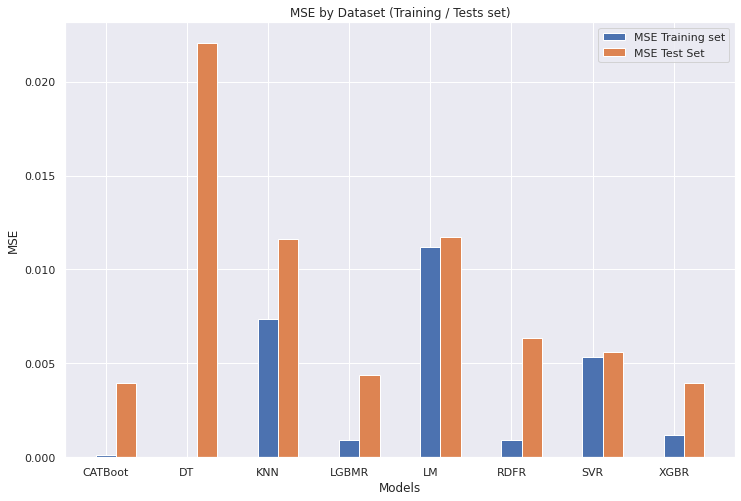

In [38]:
#Write your code here 
import matplotlib.pyplot as plt
index = np.arange(0,160,20)
bar_width = 5
list_models = [model_CatBoot(),model_DT(),model_KNN(),model_LGBMR(),model_LM(),model_RandomFR(),model_SVR(),model_XGBR()]
score_test = []
score_train = []
model_name = []
for model in list_models:
  model.fit(X_train, y_train)
  y_pred= model.predict(X_test)
  y_pred_train = model.predict(X_train)
  score_test.append(mse_model_fun(y_test,y_pred) )
  score_train.append(mse_model_fun( y_train, y_pred_train))
  model_name.append(str(type(model).__name__))
fig, ax = plt.subplots()
summer = ax.bar(index, score_train, bar_width,
                label="MSE Training set")

winter = ax.bar(index + bar_width,  score_test,
                 bar_width, label="MSE Test Set")

ax.set_xlabel('Models')
ax.set_ylabel('MSE')
ax.set_title('MSE by Dataset (Training / Tests set)')
ax.set_xticks(index)
ax.set_xticklabels(['CATBoot','DT','KNN','LGBMR','LM','RDFR','SVR','XGBR'])
ax.legend()
plt.rcParams["figure.figsize"] = (800,800)
plt.show()


3)	Draw a conclusion about the best model taken into account this criterion.

CatBoot is the best regression model based on MSE